[View in Colaboratory](https://colab.research.google.com/github/prateek-01/News_Recommendation_System/blob/master/News_Recommendation_ExistingUser.ipynb)

# News Recommendation System Based on Implicit Click Stream Data and Hybrid Filtering Approach





In [0]:
!pip install gensim

In [0]:
import gensim
import nltk
from gensim.models import Doc2Vec
from multiprocessing import cpu_count
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

In [5]:
# Uploading files to google collaboratory cloud (Please choose the file on your local system after running this cell)

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving news_articles.csv to news_articles.csv
User uploaded file "news_articles.csv" with length 8590199 bytes


In [0]:
import io
data = io.BytesIO(uploaded['news_articles.csv'])

In [0]:
import pandas as pd
news_data = pd.read_csv(data)

In [8]:
news_data.head(5)

,Article_Id,Title,Author,Date,Content,URL
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...


In [9]:
news_length = news_data['Content'].apply(lambda x : x.split(" "))
news_length = [len(i) for i in news_length]
news_length[:5],min(news_length) , max(news_length)

([233, 231, 247, 355, 272], 3, 2375)

In [10]:
greater = [i for i in news_length if i>1200]
len(greater)

16

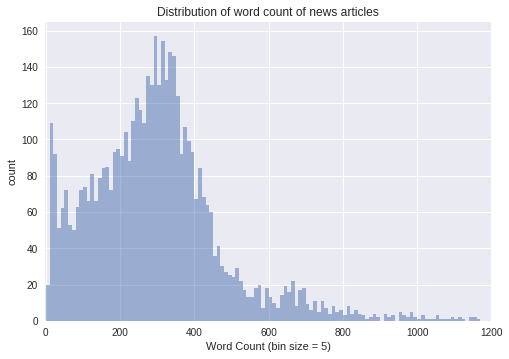

In [11]:
# Plotting word count

data = news_length

# fixed bin size
bins = np.arange(0, 1200, 10) # fixed bin size

plt.xlim([min(data)-5, 1200])

plt.hist(data, bins=bins, alpha=0.5)
plt.title("Distribution of word count of news articles")
plt.xlabel('Word Count (bin size = 5)')
plt.ylabel('count')

plt.show()

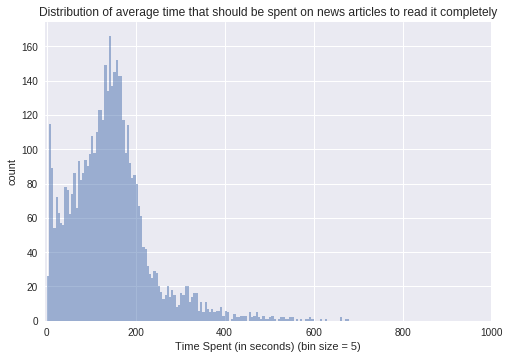

In [12]:
#Considering average reading speed of 125 words per minute

time_spent = [float((i/125)*60) for i in news_length]   #Aprrox Time that should be spent on each article to read it completely

bins = np.arange(0, 800, 5) # fixed bin size

plt.xlim([min(time_spent)-5, 1000])

plt.hist(time_spent, bins=bins, alpha=0.5)
plt.title("Distribution of average time that should be spent on news articles to read it completely")
plt.xlabel('Time Spent (in seconds) (bin size = 5)')
plt.ylabel('count')

plt.show()

In [13]:
min(time_spent) , max(time_spent)

(1.44, 1140.0)

In [14]:
optimum_time_per_article = dict(zip(news_data['Article_Id'],time_spent))
len(optimum_time_per_article)

4831

# Import Generated data


##  Now we have simulate PERCENTAGE TIME SPENT(in other ipython notebook) to model 4 kind of user behaviours -'Bounce' ,'Shallow' , 'Deep' ,'Complete' 


*   We will model the above 4 behaviours using 1 Chi-Square and 3 Guassians Distributions
  



In [15]:
uploaded = files.upload()

Saving Generated_Click_Stream_Data.csv to Generated_Click_Stream_Data.csv


In [0]:
import io
click_stream = io.BytesIO(uploaded['Generated_Click_Stream_Data.csv'])

In [37]:
click_stream_data = pd.read_csv(click_stream)
click_stream_data.head(8)

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent
0,0,1,1,2034,0,0
1,1,1,1,2091,0,0
2,2,1,1,3375,0,0
3,3,1,1,1623,1,16
4,4,1,1,1711,0,0
5,5,1,1,3178,0,0
6,6,1,1,3661,0,0
7,7,1,1,3676,0,0


In [0]:
# Adding optimal_time_spent column for every corresponding Article_Id
optimal_time =[]

for i in click_stream_data['ArticleId_served'] :
    optimal_time.append(optimum_time_per_article[i])



In [38]:
click_stream_data['optimal_time'] = optimal_time
click_stream_data.head()

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent,optimal_time
0,0,1,1,2034,0,0,35.04
1,1,1,1,2091,0,0,72.00
2,2,1,1,3375,0,0,199.20
3,3,1,1,1623,1,16,137.76
4,4,1,1,1711,0,0,144.48


In [39]:
#Verifying above Optimal time for first row of the dataframe

(news_length[2034]/125)*60

35.04

In [0]:
click_stream_data['Actual_time_spent'] = (click_stream_data['Percentage Time Spent']/100)*click_stream_data['optimal_time']

In [41]:
click_stream_data.head(10)

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent,optimal_time,Actual_time_spent
0,0,1,1,2034,0,0,35.04,0.0000
1,1,1,1,2091,0,0,72.00,0.0000
2,2,1,1,3375,0,0,199.20,0.0000
3,3,1,1,1623,1,16,137.76,22.0416
4,4,1,1,1711,0,0,144.48,0.0000
5,5,1,1,3178,0,0,63.36,0.0000
6,6,1,1,3661,0,0,91.20,0.0000
7,7,1,1,3676,0,0,108.96,0.0000
8,8,1,1,589,0,0,60.96,0.0000
9,9,1,1,3310,0,0,140.64,0.0000


## Distribution of Percentage Time spent as generated by our Mixture Model of Gaussians


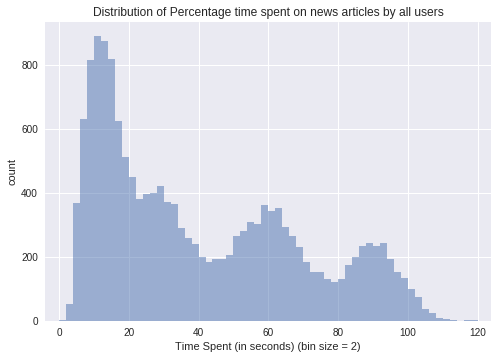

In [42]:

percentage_time_spent = click_stream_data[click_stream_data['Percentage Time Spent']>0]['Percentage Time Spent']

bins = np.arange(0, 130, 2) # fixed bin size

plt.xlim([min(percentage_time_spent)-5, max(percentage_time_spent +5)])

plt.hist(percentage_time_spent, bins=bins, alpha=0.5)
plt.title("Distribution of Percentage time spent on news articles by all users")
plt.xlabel('Time Spent (in seconds) (bin size = 2)')
plt.ylabel('count')

plt.show()




### Distribution of Actual Time Spent by all users 
(After taking into consideration the length of articles through the optimal time for each article ,as calculated above)

In [0]:
time_spent = click_stream_data[click_stream_data['Actual_time_spent']>0]['Actual_time_spent']

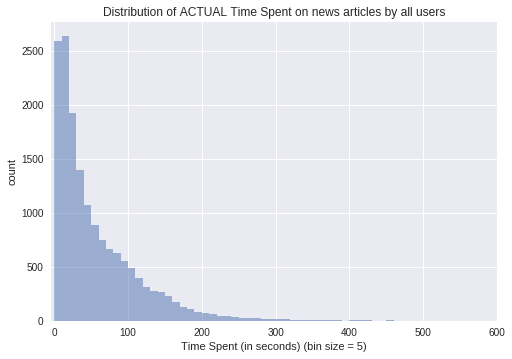

In [44]:
bins = np.arange(0, 800, 10) # fixed bin size

plt.xlim([min(time_spent)-5, 600])

plt.hist(time_spent, bins=bins, alpha=0.5)
plt.title("Distribution of ACTUAL Time Spent on news articles by all users")
plt.xlabel('Time Spent (in seconds) (bin size = 5)')
plt.ylabel('count')

plt.show()

## Creating Doc2Vec Representation of all Documents

In [0]:
import os
import pprint
import re
import gensim
from gensim.models import Doc2Vec
import multiprocessing
from multiprocessing import cpu_count

In [0]:
news_list=list()

In [0]:
class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])

In [0]:
for index, a in news_data.iterrows():   
    
    sentence =a['Content']+' '+str(a['Title'])+' '+str(a['Author'])
    
    news_list.append(gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(sentence), [a['Article_Id']]))

In [49]:
print(len(news_list))
print(news_list[3561])   # Created TaggedDocument Object for every news article

4831
TaggedDocument(['bollywood', 'lovebirds', 'ranbir', 'kapoor', 'and', 'katrina', 'kaif', 'who', 'are', 'currently', 'working', 'together', 'in', 'anurag', 'basu', 'jagga', 'jasoos', 'that', 'has', 'been', 'encountering', 'delays', 'in', 'shooting', 'are', 'likely', 'to', 'star', 'in', 'another', 'film', 'together', 'the', 'real', 'life', 'couple', 'has', 'been', 'approached', 'to', 'play', 'the', 'lead', 'pair', 'in', 'yash', 'raj', 'films', 'yrf', 'untitled', 'next', 'apparently', 'varun', 'dhawan', 'who', 'is', 'one', 'of', 'the', 'most', 'sought', 'after', 'actors', 'thesedays', 'with', 'back', 'to', 'back', 'hits', 'is', 'likely', 'to', 'star', 'alongside', 'ranbir', 'and', 'katrina', 'currently', 'the', 'script', 'is', 'being', 'worked', 'out', 'and', 'it', 'will', 'most', 'likely', 'be', 'romantic', 'comedy', 'as', 'far', 'as', 'the', 'casting', 'goes', 'aditya', 'chopra', 'is', 'keen', 'on', 'roping', 'in', 'ranbir', 'katrina', 'and', 'varun', 'as', 'they', 'will', 'suit', '

In [0]:
# Dimensionality of the resulting document vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 100

# Minimum word count threshold.
min_word_count = 2

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 10

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 10e-6

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [0]:
model = gensim.models.Doc2Vec( dm = 1, alpha=0.025, vector_size= num_features, min_alpha=0.025, min_count=min_word_count, workers = num_workers,window = context_size,
                              negative = 5, sample = downsampling,seed = 1)

In [0]:
model.build_vocab(news_list)

In [53]:
model.corpus_count

4831

In [54]:
# start training (Will take about 20 minutes to train)
for epoch in range(20):
    if epoch % 2 == 0:
        print ('Now training epoch %s'%epoch)
    model.train(news_list, total_examples= model.corpus_count, epochs=20)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Now training epoch 0
Now training epoch 2
Now training epoch 4
Now training epoch 6
Now training epoch 8
Now training epoch 10
Now training epoch 12
Now training epoch 14
Now training epoch 16
Now training epoch 18


### Explore the trained model.

In [55]:
type(model.docvecs),model.docvecs[0]   #50 length doc2vec for Article_Id '0'

(gensim.models.keyedvectors.Doc2VecKeyedVectors,
 array([-0.06279828,  2.7389476 , -2.165651  ,  2.118585  ,  1.299667  ,
         0.4570813 ,  0.6517864 ,  0.733076  , -1.4207861 , -2.1578472 ,
        -0.09532958,  1.1896428 , -1.3897967 ,  1.0946971 , -0.98229754,
        -0.41821775,  1.3843094 ,  0.5071587 , -4.406947  ,  1.1240064 ,
         3.2737396 ,  0.14214069, -2.0335867 ,  1.8011222 ,  1.1402266 ,
        -3.1747746 ,  0.32155994,  0.22760525,  1.3943702 ,  0.22993587,
        -0.5295977 , -0.74242425, -1.1763742 ,  0.11407838,  1.7511857 ,
        -4.4422584 , -1.2637751 , -0.56843024, -1.7556788 , -0.95902526,
         0.38804048,  1.582597  ,  1.380103  ,  1.7863513 ,  0.86756593,
        -2.5871575 ,  2.1864526 ,  1.1953868 , -3.7070246 , -0.7592393 ,
        -0.6510491 ,  1.5071203 , -1.3753115 , -0.27372858,  0.0855688 ,
         1.3230897 , -0.7255438 ,  0.42250735, -0.49203753, -0.74900013,
        -1.2399089 ,  0.5324465 , -0.27703643,  3.681218  , -0.2199744 ,
  

### Compress the document vectors into 2D space and plot them

In [56]:
all_doc_vectors_matrix = model.docvecs.doctag_syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [57]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(all_doc_vectors_matrix)

print ('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.06080598384141922


## Since PCA is explaining very less variance(06.06 %) by reducing to 2 dimensions, we will use t-SNE for vizualizing data in 2 dimensions.

In [0]:
import sklearn.manifold

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [59]:
print(type(all_doc_vectors_matrix),all_doc_vectors_matrix.shape)



<class 'numpy.ndarray'> (4831, 100)


### Train t-sne

In [0]:
all_doc_vectors_matrix_2d = tsne.fit_transform(all_doc_vectors_matrix) #will take about 5 minutes to train

In [61]:
all_doc_vectors_matrix_2d.shape

(4831, 2)

In [62]:
data = all_doc_vectors_matrix_2d
data[:5]

array([[ 13.959733  , -22.59889   ],
       [-10.581424  ,  17.579378  ],
       [  0.72858435,  -7.483966  ],
       [-46.181595  , -11.248044  ],
       [  9.653675  ,   0.7914525 ]], dtype=float32)

## Plot the Big Picture

In [0]:
index = ['news'+str(i) for i in range(1, len(data)+1)]

In [64]:
points = pd.DataFrame(data=data[0:,0:],    # values
              index=index,    # 1st column as index
              columns=[ "x", "y"]# 1st row as the column names
             
            )

points.head()

,x,y
news1,13.959733,-22.598890
news2,-10.581424,17.579378
news3,0.728584,-7.483966
news4,-46.181595,-11.248044
news5,9.653675,0.791453


Text(13.9597,-22.5989,'0')

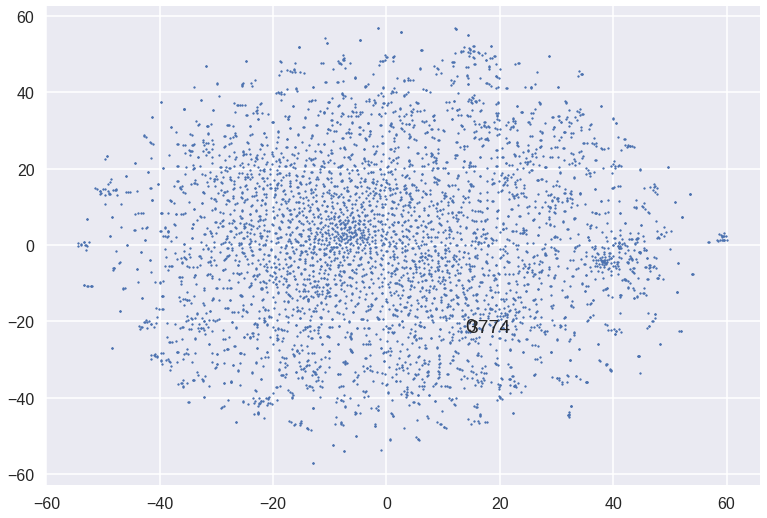

In [65]:
import seaborn as sns
import matplotlib

sns.set_context("poster")

fig, ax = plt.subplots()
ax.scatter(points['x'],points['y'], s = 3)

  
ax.annotate('3774', (points['x'][3774],points['y'][3774]))

ax.annotate('0', (points['x'][0],points['y'][0]))

# ax.annotate('13', (points['x'][13],points['y'][13]))

# ax.annotate('3320', (points['x'][3320],points['y'][3320]))




In [66]:
closest_doc2 = model.docvecs.most_similar([model.docvecs[0]],topn=10)

closest_doc2

# Most similar docs to document with Id- '0'
# Note the first four similar docs-Ids annotated in above graph (very closely spaced)

[(0, 0.9999999403953552),
 (13, 0.6717875003814697),
 (12, 0.646547257900238),
 (3320, 0.6458587050437927),
 (3073, 0.6442161798477173),
 (3317, 0.6291467547416687),
 (3318, 0.621284008026123),
 (2957, 0.6066161394119263),
 (3774, 0.6048301458358765),
 (18, 0.6013597249984741)]

In [67]:
#looking at the above generated similar docs

news_list[0],news_list[3774] , news_list[3320], news_list[13], news_list[3073]

(TaggedDocument(words=['at', 'least', 'people', 'died', 'and', 'others', 'were', 'injured', 'after', 'bus', 'travelling', 'from', 'hyderabad', 'to', 'kakinada', 'plunged', 'into', 'canal', 'from', 'bridge', 'on', 'the', 'accident', 'prone', 'stretch', 'of', 'the', 'hyderabad', 'khammam', 'highway', 'in', 'telangana', 'early', 'monday', 'morning', 'the', 'injured', 'were', 'admitted', 'to', 'the', 'government', 'general', 'hospital', 'for', 'treatment', 'seven', 'people', 'died', 'on', 'the', 'spot', 'and', 'the', 'others', 'succumbed', 'to', 'injuries', 'while', 'undergoing', 'treatment', 'at', 'the', 'hospital', 'the', 'passengers', 'belonged', 'to', 'the', 'east', 'and', 'west', 'godavari', 'districts', 'of', 'andhra', 'pradesh', 'the', 'bus', 'owned', 'by', 'private', 'operator', 'yatra', 'genie', 'commenced', 'its', 'journey', 'from', 'hyderabad', 'at', 'on', 'sunday', 'khammam', 'superintendent', 'of', 'police', 'shah', 'nawaz', 'khan', 'was', 'quoted', 'by', 'the', 'hindustan', '

## Verifying that linear combination of doc2vec still keeps the context intact
(Same concept would be used while creating User2Vec going further)

In [68]:
news_list[1000], news_list[200]

(TaggedDocument(words=['after', 'months', 'of', 'delay', 'american', 'network', 'carrier', 'mobile', 'released', 'the', 'android', 'marshmallow', 'update', 'to', 'series', 'flagship', 'phablets', 'galaxy', 'note', 'edge', 'and', 'note', 'in', 'the', 'the', 'new', 'update', 'with', 'baseband', 'versions', 'tuvu', 'dpe', 'or', 'uvu', 'dpe', 'and', 'tuvu', 'cpe', 'which', 'weigh', 'around', 'gb', 'are', 'being', 'deployed', 'to', 'the', 'galaxy', 'note', 'and', 'note', 'edge', 'respectively', 'via', 'over', 'the', 'air', 'ota', 'the', 'company', 'said', 'on', 'the', 'support', 'page', 'the', 'new', 'android', 'marshmallow', 'brings', 'the', 'doze', 'battery', 'optimisation', 'feature', 'improved', 'now', 'on', 'tap', 'search', 'option', 'support', 'for', 'more', 'international', 'dialects', 'silent', 'mode', 'to', 'the', 'sound', 'profile', 'do', 'not', 'disturb', 'option', 'performance', 'enhancing', 'optimisations', 'enhanced', 'boot', 'security', 'system', 'and', 'many', 'more', 'also'

In [73]:


closest_doc2 = model.docvecs.most_similar([0.5*model.docvecs[200]]+ [model.docvecs[1000]],topn=10)

closest_doc2 ,news_list[200],news_list[1000], news_list[1012] , news_list[961], news_list[1076]   #The similar documents are related to doc-Id 1000 since it has been given High weightage

([(1000, 0.9811493158340454),
  (1012, 0.7443543076515198),
  (1428, 0.6969035267829895),
  (1076, 0.6543658971786499),
  (391, 0.6456440687179565),
  (302, 0.6339237689971924),
  (1226, 0.6325364112854004),
  (1069, 0.6307309865951538),
  (1130, 0.6291780471801758),
  (1426, 0.627206563949585)],
 TaggedDocument(words=['the', 'trailer', 'of', 'long', 'delayed', 'rajini', 'murugan', 'was', 'released', 'on', 'thursday', 'december', 'to', 'coincide', 'with', 'the', 'new', 'year', 'celebrations', 'sony', 'music', 'the', 'official', 'audio', 'rights', 'holder', 'of', 'rajini', 'murugan', 'sivakarthikeyan', 'rajini', 'murugan', 'trailer', 'released', 'on', 'thursday', 'the', 'video', 'garners', 'positive', 'reviews', 'prakash', 'upadhyaya'], tags=[200]),
 TaggedDocument(words=['after', 'months', 'of', 'delay', 'american', 'network', 'carrier', 'mobile', 'released', 'the', 'android', 'marshmallow', 'update', 'to', 'series', 'flagship', 'phablets', 'galaxy', 'note', 'edge', 'and', 'note', 'in'

Text(38.9766,-11.3721,'1076')

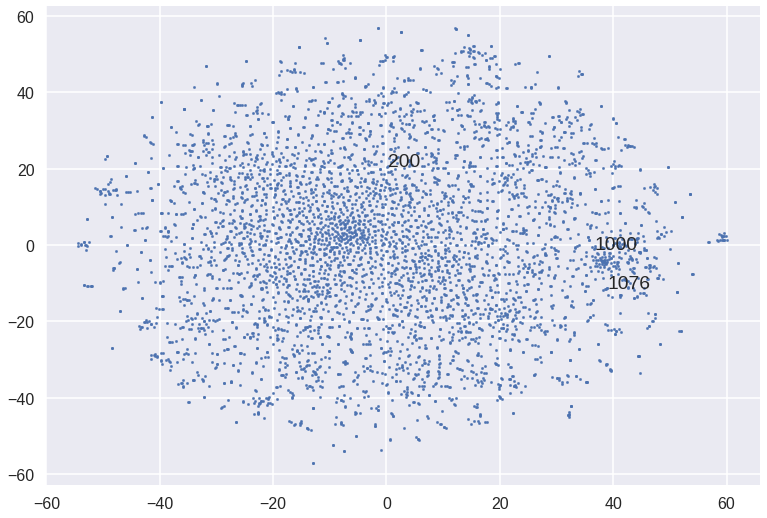

In [70]:
sns.set_context("poster")

fig, ax = plt.subplots()
ax.scatter(points['x'],points['y'], s = 5)

ax.annotate('1000', (points['x'][1000],points['y'][1000]))

ax.annotate('200', (points['x'][200],points['y'][200]))

ax.annotate('1076', (points['x'][1076],points['y'][1076]))


# Doc-Id 439 is more closer to doc-ID 500 since it has been given more weightage while combining them linearly as above.

## Now creating User Profiles by creating  'User2vec' which would be a time-weighted average of doc2vec

In [71]:
click_stream_data.head(10)

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent,optimal_time,Actual_time_spent
0,0,1,1,2034,0,0,35.04,0.0000
1,1,1,1,2091,0,0,72.00,0.0000
2,2,1,1,3375,0,0,199.20,0.0000
3,3,1,1,1623,1,16,137.76,22.0416
4,4,1,1,1711,0,0,144.48,0.0000
5,5,1,1,3178,0,0,63.36,0.0000
6,6,1,1,3661,0,0,91.20,0.0000
7,7,1,1,3676,0,0,108.96,0.0000
8,8,1,1,589,0,0,60.96,0.0000
9,9,1,1,3310,0,0,140.64,0.0000


In [74]:
article2vec = []
for i in list(click_stream_data['ArticleId_served']):
  article2vec.append(model.docvecs[i])
  
len(article2vec)  

80060

In [75]:
click_stream_data['Article2vec'] = article2vec

click_stream_data.head()

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent,optimal_time,Actual_time_spent,Article2vec
0,0,1,1,2034,0,0,35.04,0.0000,"[-0.9389837, 1.1480346, -1.1359936, 1.4685382,..."
1,1,1,1,2091,0,0,72.00,0.0000,"[2.1679804, 0.491248, 3.346303, -2.371358, -1...."
2,2,1,1,3375,0,0,199.20,0.0000,"[-2.458731, 0.8904928, -1.7483199, -2.2864459,..."
3,3,1,1,1623,1,16,137.76,22.0416,"[-2.8787978, 4.570846, -0.21314676, -0.0704924..."
4,4,1,1,1711,0,0,144.48,0.0000,"[-0.18803371, 4.0596147, 0.24285765, 1.0559925..."


In [76]:
click_stream_data['User_scaled_article2vec'] = (click_stream_data['Percentage Time Spent']/100)*click_stream_data['Article2vec']

click_stream_data.head(5)

,Unnamed: 0,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent,optimal_time,Actual_time_spent,Article2vec,User_scaled_article2vec
0,0,1,1,2034,0,0,35.04,0.0000,"[-0.9389837, 1.1480346, -1.1359936, 1.4685382,...","[-0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -..."
1,1,1,1,2091,0,0,72.00,0.0000,"[2.1679804, 0.491248, 3.346303, -2.371358, -1....","[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0..."
2,2,1,1,3375,0,0,199.20,0.0000,"[-2.458731, 0.8904928, -1.7483199, -2.2864459,...","[-0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0,..."
3,3,1,1,1623,1,16,137.76,22.0416,"[-2.8787978, 4.570846, -0.21314676, -0.0704924...","[-0.46060762, 0.73133534, -0.03410348, -0.0112..."
4,4,1,1,1711,0,0,144.48,0.0000,"[-0.18803371, 4.0596147, 0.24285765, 1.0559925...","[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0..."


In [0]:
user2vec_list = list(click_stream_data.groupby('UserId')['User_scaled_article2vec'])   # list of tuples

In [0]:
user2vec_num = list(click_stream_data.groupby('UserId')['Click'].sum())  # Capturing total number of articles clicked by every user

In [79]:
len(user2vec_num),len(user2vec_list)

(3999, 3999)

In [80]:
user2vec = np.array(user2vec_list)
user2vec.shape


(3999, 2)

In [0]:
uservec_dict = {}

for i in range(3999):
  uservec_dict[i+1] = user2vec[i][1].sum()/user2vec_num[i]
  

In [82]:
uservec_dict[1].shape

(100,)

In [0]:
uservec_dict   #contains user-vector corresponding to each user-Id (i.e User-Profile)

In [0]:
uservec_df = pd.DataFrame(uservec_dict).T

In [243]:
uservec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,-0.096163,-2.795915,-0.078723,0.799430,-1.156613,1.726739,-0.745519,1.518635,1.669219,-0.726670,...,-0.899128,0.159879,-0.524640,1.723419,-0.384417,2.166168,0.441083,0.610752,-0.463649,-1.315497
2,-0.000076,-0.326357,0.049398,0.118400,0.255423,0.227098,0.390911,0.486147,0.178624,-0.148716,...,0.282608,-0.176759,0.368488,-0.279192,-0.188699,0.105571,0.273467,0.037707,0.293946,-0.235592
3,-0.020771,-0.150065,0.155649,0.202356,-0.077157,0.280772,0.030675,0.128646,0.043125,-0.199532,...,0.105900,-0.012500,-0.144561,0.051766,-0.163330,0.207444,0.107777,0.148238,0.021424,-0.219152
4,-0.062098,-0.216515,0.151208,0.089352,0.087441,0.380781,0.226064,0.150953,0.112259,0.066563,...,-0.080641,0.015425,-0.076561,0.143611,-0.388634,0.302794,0.123232,0.141027,-0.007277,-0.144744
5,-0.225969,-0.065042,-0.241676,0.515270,-0.060086,0.093484,0.226224,0.632219,-0.047127,-0.089162,...,0.368766,0.360326,-0.005407,-0.248168,-0.298048,0.338560,0.064496,-0.136712,0.115054,-0.136216


## Computing user-user similarity matrix using cosine-similarity 

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim = cosine_similarity(uservec_df)

In [223]:
type(user_sim)

numpy.ndarray

## Plotting the user-user similarity matrix for first 50 users

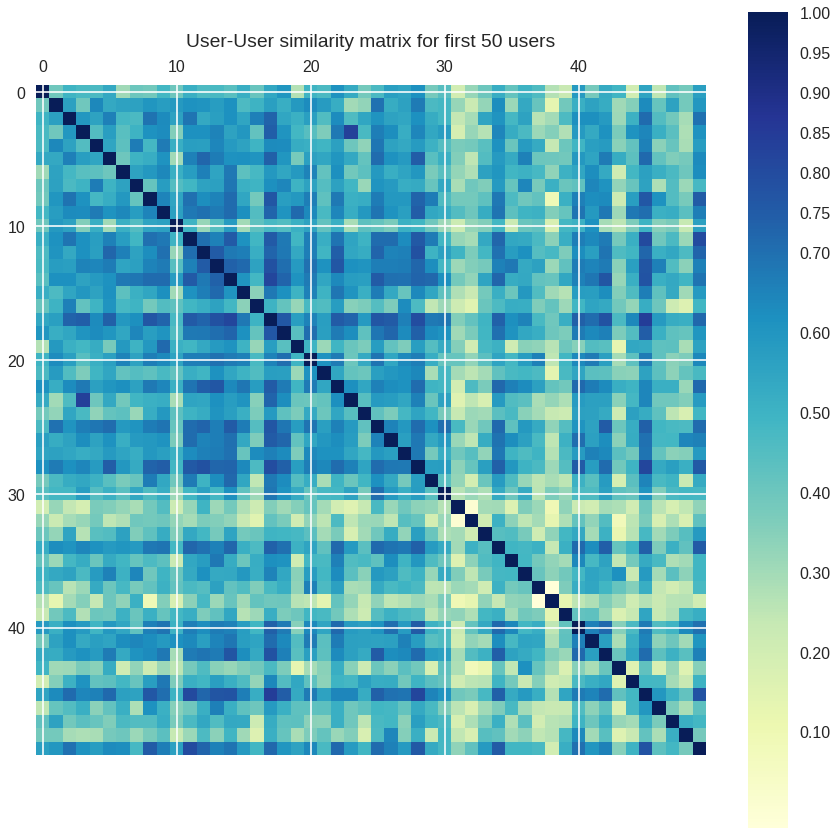

In [244]:
from matplotlib import cm as cm

# cmap = cm.get_cmap('Greens')
cmap = cm.get_cmap('YlGnBu')
# cmap = cm.get_cmap('RdYlGn')


ig, ax = plt.subplots(figsize=(15,15))
cax = ax.matshow(user_sim[0:50,0:50], interpolation='nearest', cmap = cmap)
ax.grid(True)
plt.title('User-User similarity matrix for first 50 users')
# plt.xticks(range(70),, rotation=90);
# plt.yticks(range(70));
ig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()



 

 



# Recommendation by k-nearest items 
* The knearest items approach is inspired from traditional
content-based filtering recommendation method. 
* For the recommendation the similarity
between the target user and the items are calculated and the
items that are more similar to the target user are listed as
the recommendation.

In [0]:
def cos_matrix_multiplication(matrix, vector):
    """
    Calculating pairwise cosine distance using matrix vector multiplication.
    """
    dotted = matrix.dot(vector)
    matrix_norms = np.linalg.norm(matrix, axis=1)
    vector_norm = np.linalg.norm(vector)
    matrix_vector_norms = np.multiply(matrix_norms, vector_norm)
    neighbors = np.divide(dotted, matrix_vector_norms)
    return neighbors
  

In [0]:
def k_nearest_items(user , k):
  """
  Finds out 'K' most similar documents for 'userId', returning dictionary of Document Ids and the cosine-similarity scores 
  """
#   print(type(user))
  if type(user) == int:
    
    user_doc_similarity = list(cos_matrix_multiplication(all_doc_vectors_matrix, uservec_dict[user]))
    
  else :
    user_doc_similarity = list(cos_matrix_multiplication(all_doc_vectors_matrix, user))
    
  doc_Id = [i for i in range(4831)]
  user_doc_sim_dict = {}
  for i in range(len(doc_Id)):
      user_doc_sim_dict[doc_Id[i]] = user_doc_similarity[i]
      
      
  sorted_dict = sorted(user_doc_sim_dict.items(), key=lambda x: x[1], reverse = True)
  
  return sorted_dict[:int(k)]

In [247]:
k_nearest_items(2000, k = 10)  #Either provide 'userId' or the 'User vector'

[(3445, 0.94608754),
 (743, 0.7185855),
 (561, 0.71451056),
 (4158, 0.6828359),
 (1049, 0.6779811),
 (361, 0.64898795),
 (600, 0.6488404),
 (3603, 0.6446006),
 (427, 0.6429965),
 (58, 0.63969755)]

In [248]:
news_list[2000],news_list[3445],news_list[743], news_list[561], news_list[600]

(TaggedDocument(words=['all', 'india', 'bakchod', 'aib', 'knockout', 'roast', 'has', 'become', 'the', 'most', 'talked', 'about', 'show', 'ever', 'since', 'it', 'was', 'uploaded', 'on', 'the', 'video', 'sharing', 'website', 'youtube', 'the', 'video', 'of', 'the', 'controversial', 'show', 'hosted', 'by', 'karan', 'johar', 'ranveer', 'singh', 'and', 'arjun', 'kapoor', 'was', 'removed', 'from', 'the', 'site', 'on', 'tuesday', 'for', 'its', 'filthy', 'and', 'rude', 'content', 'for', 'the', 'past', 'one', 'week', 'aibroast', 'and', 'have', 'become', 'the', 'popular', 'hashtags', 'on', 'micro', 'blogging', 'site', 'twitter', 'and', 'other', 'social', 'networking', 'sites', 'with', 'many', 'supporting', 'and', 'some', 'opposing', 'the', 'show', 'tagging', 'it', 'as', 'vulgar', 'while', 'deepika', 'padukone', 'alia', 'bhatt', 'sonakshi', 'sinha', 'and', 'many', 'other', 'bollywood', 'celebs', 'who', 'attended', 'the', 'show', 'applauded', 'it', 'kamaal', 'khan', 'pooja', 'missra', 'among', 'oth

# Recommendation by N-nearest users and k-nearest items :
* This approach is a combination of content based and collaborative filtering approach.
* In this approach, first, the top-N neighbors are found by using the vector representation of the users. 
* Then, the top-N dissimilar neighbors are found by using the vector representation of the users, considering a certian threshold of dissimilarity.
* The top-k items that are most similar to the combination of target user and the neighbors(similar and dissimilar) are found by using the vector representations calculated in the first step. 
* The collected topk items are recommended to the target user.
* The first 7 recommendations are generated from average vector of N-nearest Users.
* The last 3 recommendations are generated from average vector of N-dissimilar Users.
* Dissimilarity will be between 0-50 , chosen randomly each time.

In [0]:
def N_nearest_users(userId , N , k):


  nearest_users = {}
  
  for i in range(3999):
     if (i+1) != userId:
      nearest_users[i+1] = user_sim[userId-1][i]
    
  sorted_nearest_users = sorted(nearest_users.items(), key=lambda x: x[1], reverse = True)
  N_sorted_nearest_users = sorted_nearest_users[:N]

  avg_nearest_user_vector = uservec_dict[userId]

  for i in N_sorted_nearest_users :
  
    avg_nearest_user_vector +=  uservec_dict[i[0]]

  avg_nearest_user_vector /= (N+1)

  final_list =  k_nearest_items(avg_nearest_user_vector, k = 0.7*k)    # 7 items based on N-nearest neighbors 




  threshold = random.randint(1,50)/100
  print('Considering {} Dissimilar Users with less than {} % similarity for exploration of user interests beyond personalization'.format(N,int(threshold*100)))

  N_dissimilar_users = [i for i in sorted_nearest_users if i[1] < threshold ][:N] 

  avg_dissimilar_user_vector = uservec_dict[userId]

  for i in N_dissimilar_users :
  
    avg_dissimilar_user_vector +=  uservec_dict[i[0]]
  
  avg_dissimilar_user_vector /= (N+1) 

  final_list.append(k_nearest_items(avg_dissimilar_user_vector, k = 0.3*k))  # 3 items based on N-dissimlar neighbors with different threshold everytime generated randomly(<50)
#   final_flat_list = [item for sublist in final_list for item in sublist]
  return final_list
  
  

## Generating 10 Recommendations for UserId 1 , considering 5 nearest and 5 dissimilar users 
* Note - the last three recommended items show similarity score with the averaged N dissimilar User vector with corresponding news vector. 

In [266]:
N_nearest_users(12,5,10)  

Considering 5 Dissimilar Users with less than 17 % similarity for exploration of user interests beyond personalization


[(1980, 0.89488435),
 (238, 0.86827755),
 (229, 0.8417136),
 (476, 0.83108336),
 (3562, 0.8218666),
 (360, 0.8190146),
 (391, 0.8129686),
 [(1980, 0.85844755), (229, 0.85293394), (238, 0.85244143)]]

## User-1 has read 3 articles with articleId 1623(16 %) , 3961(30 %) and 2346(8 %)

In [231]:
news_list[1623], news_list[3961], news_list[2346]

(TaggedDocument(words=['deepika', 'kumari', 'has', 'been', 'one', 'of', 'the', 'best', 'archers', 'for', 'while', 'and', 'the', 'indian', 'reached', 'another', 'high', 'in', 'her', 'career', 'when', 'she', 'equalled', 'the', 'world', 'record', 'in', 'the', 'recurve', 'event', 'during', 'the', 'ongoing', 'archery', 'world', 'cup', 'in', 'shanghai', 'deepika', 'equalled', 'reigning', 'olympic', 'and', 'world', 'archery', 'champion', 'korea', 'ki', 'bo', 'bae', 'record', 'of', 'points', 'on', 'wednesday', 'deepika', 'showed', 'amazing', 'form', 'in', 'the', 'competition', 'as', 'she', 'shot', 'in', 'the', 'front', 'half', 'while', 'scoring', 'in', 'the', 'second', 'to', 'equal', 'the', 'record', 'there', 'was', 'pressure', 'on', 'deepika', 'with', 'her', 'final', 'six', 'arrows', 'as', 'she', 'was', 'required', 'score', 'of', 'points', 'to', 'break', 'the', 'korean', 'record', 'however', 'she', 'could', 'not', 'get', 'off', 'to', 'great', 'start', 'scoring', 'two', 'nines', 'from', 'the',

## The Recommendations will keep getting better as more and more click-stream data is generated and the user2vec gets more personalized.

With more computing power and Better training time, we would have generated doc2vec for upto 300 features and multiple epochs to generate more robust Recommendations.